# **ISIDE: Data Exploration**

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as sp

%matplotlib inline

## 2. Set up Google Drive Filesystem

In [ ]:
GDRIVE_MOUNT_DIR = "/content/drive"
GDRIVE_BASE_DIR = GDRIVE_MOUNT_DIR + "/MyDrive/Tmp/ISIDE"

In [ ]:
from google.colab import drive
drive.mount(GDRIVE_MOUNT_DIR)

Mounted at /content/drive


## 3. Load the dataset

In [ ]:
sentinels = ['None', 'n.d.', ' ', '']
df = pd.read_csv(GDRIVE_BASE_DIR+'/assets/yid_out.tsv', sep='\t', na_values=sentinels)

In [ ]:
df.head()

,ID_Stud,annoAccaCors,annoCorso,annoDiNascita,cittadinanza,codCorso,creditiTotali,facolta,flagIdentificato,iscritto,...,ultIscr,valoreIntero,cfuPrenotati,ultPren,cfuTake,ultSup,mediaVoto,votoDiploma,lastLogin,Dropout
0,1,1640991600,2,946681200,UE,29950,180,LETTERE E FILOSOFIA,0,True,...,1609455600,57.0,18,1645052400,54,1644534000,28.0,82.0,1644601030,False
1,2,1640991600,4,915145200,ITA,30009,360,Interfacolta tra FARMACIA E MEDICINA - MEDICIN...,1,True,...,1609455600,50000.0,12,1645398000,136,1644188400,27.0,84.0,1644442067,False
2,3,1640991600,2,852073200,Extra-UE,30827,120,ECONOMIA,1,True,...,1609455600,9072.0,9,1613343600,9,1613343600,26.0,72.0,1644473621,False
3,4,1640991600,1,915145200,ITA,30046,180,"SCIENZE MATEMATICHE, FISICHE E NATURALI",1,True,...,1609455600,50000.0,18,1645138800,150,1643151600,23.0,82.0,1644355169,False
4,5,1640991600,2,631148400,ITA,27592,120,INGEGNERIA CIVILE E INDUSTRIALE,0,False,...,1514761200,50000.0,0,946684800,111,1548198000,27.0,76.0,1636963837,False


In [ ]:
print(df.shape)

(73225, 27)


## 4. Set up global plot aesthetics

In [2]:
# Global settings
sns.set_theme()
sns.set_context("paper", font_scale=1.5)
orange_red="orangered"
forest_green="forestgreen"
steel_blue="steelblue"
tab_orange="tab:orange"
tab_blue="tab:blue"
#sns.color_palette("tab10")[0], sns.color_palette("tab10")[1]

## 5. Plots

### 5.1 Auxiliary functions

In [11]:
def plot_median(kdeline, x, ax, color, fill=True):
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    median = x.median()
    ax.vlines(median, 0, np.interp(median, xs, ys), color=color, ls=':', lw=2)
    if fill:
        ax.fill_between(xs, 0, ys, facecolor=color, alpha=0.2)
    

In [12]:
def plot_mean(kdeline, x, ax, color, fill=True, fill_std=True):
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    mean = x.mean()
    sdev = x.std()
    left = mean - sdev
    right = mean + sdev

    ax.vlines(mean, 0, np.interp(mean, xs, ys), color=color, ls='--', lw=2)
    if fill:
        ax.fill_between(xs, 0, ys, facecolor=color, alpha=0.2)
    ax.vlines(left, 0, np.interp(left, xs, ys), color=color, ls=':', lw=1)
    ax.vlines(right, 0, np.interp(right, xs, ys), color=color, ls=':', lw=1)
    if fill_std:
        ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor=color, alpha=0.2)

### 5.2 Dropout distribution

In [2]:
def plot_distr_dropout(df, ax):
    _ = (df['Dropout'].value_counts(normalize=True)*100).plot(kind = 'barh', color=[steel_blue, orange_red], axes=ax)
    _ = ax.set_ylabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_xlabel("Percentage (%)", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_yticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.title('Distribution of Dropout')

In [4]:
sentinels = ['None', 'n.d.', ' ', '']
df = pd.read_csv('assets/yid_out.tsv', sep='\t', na_values=sentinels)

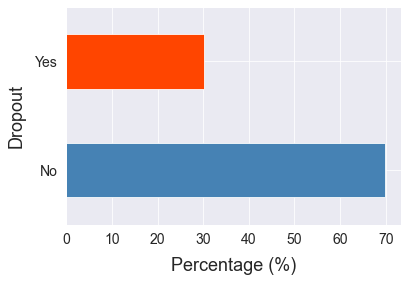

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
plot_distr_dropout(df, ax)

### 5.3 Impact of academic performance on dropout

#### 5.3.1 Average Grade

In [10]:
df_mv = df[(df["mediaVoto"] >= 18) & (df["mediaVoto"] <=31)]
df_mv_do = df_mv[df_mv["Dropout"]==True]["mediaVoto"]
df_mv_ndo = df_mv[df_mv["Dropout"]==False]["mediaVoto"]

In [11]:
print("Mean avg. grade (DROPOUT): {:.3f}".format(df_mv_do.mean()))
print("Median avg. grade (DROPOUT): {:.3f}".format(df_mv_do.median()))
print("Mean avg. grade (NON-DROPOUT): {:.3f}".format(df_mv_ndo.mean()))
print("Median avg. grade (NON-DROPOUT): {:.3f}".format(df_mv_ndo.median()))

Mean avg. grade (DROPOUT): 24.981
Median avg. grade (DROPOUT): 25.000
Mean avg. grade (NON-DROPOUT): 25.629
Median avg. grade (NON-DROPOUT): 26.000


In [3]:
def ecdf_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["mediaVoto"]
    x_non_drop = df[df["Dropout"]==False]["mediaVoto"]
    
    _ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=True, ax=ax)
    _ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=True, ax=ax)
    plt.xlim([18, 31])
    plot_median(ax.lines[0], x_non_drop, ax, color=steel_blue, fill=False)
    plot_median(ax.lines[1], x_drop, ax, color=orange_red, fill=False)
    _ = ax.set_xlabel("Average Grade", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Density", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    #drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(orange_red, alpha=0.2), ec=orange_red)
    #non_drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(steel_blue, alpha=0.2), ec=steel_blue)
    drop = plt.Line2D([0], [0], color=orange_red, lw=2)
    non_drop = plt.Line2D([0], [0], color=steel_blue, lw=2)
    _ = plt.legend([handle for i,handle in enumerate(handles) if i in display]+[drop, non_drop],
               [label for i,label in enumerate(labels) if i in display]+["Yes", "No"], 
               handlelength=1.6, handleheight=0, title="Dropout", fontsize=14, title_fontsize=16, fancybox=True)

In [4]:
def box_plot_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["mediaVoto"]
    x_non_drop = df[df["Dropout"]==False]["mediaVoto"]

    _ = sns.boxplot(x="Dropout", y=df["mediaVoto"], data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Avg. Grade", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

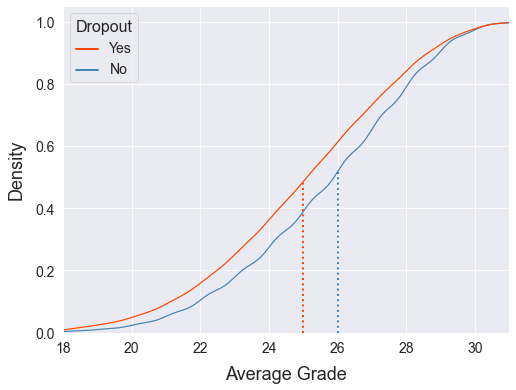

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ecdf_avg_grade(df_mv, ax)

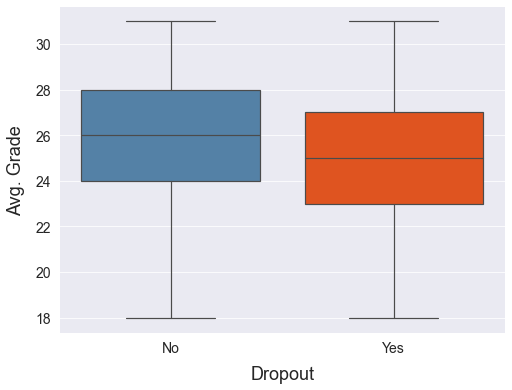

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_avg_grade(df_mv, ax)

##### Two-sample Kolmogorov-Smirnov test

In [16]:
print(np.var(df_mv_do), np.var(df_mv_ndo))

7.883884317363242 6.931373953828654


In [17]:
sp.ks_2samp(df_mv_do, df_mv_ndo)

KstestResult(statistic=0.09825844518344923, pvalue=9.761672837684112e-90)

#### 5.3.2 Average High School Grade

In [18]:
df_hs = df[(df["votoDiploma"] >= 60) & (df["votoDiploma"] <=100)]
df_hs_do = df_hs[df_hs["Dropout"]==True]["votoDiploma"]
df_hs_ndo = df_hs[df_hs["Dropout"]==False]["votoDiploma"]

In [19]:
print("Mean avg. high school grade (DROPOUT): {:.3f}".format(df_hs_do.mean()))
print("Median avg. high school grade (DROPOUT): {:.3f}".format(df_hs_do.median()))
print("Mean avg. high school grade (NON-DROPOUT): {:.3f}".format(df_hs_ndo.mean()))
print("Median avg. high school grade (NON-DROPOUT): {:.3f}".format(df_hs_ndo.median()))

Mean avg. high school grade (DROPOUT): 80.863
Median avg. high school grade (DROPOUT): 80.000
Mean avg. high school grade (NON-DROPOUT): 81.078
Median avg. high school grade (NON-DROPOUT): 80.000


In [20]:
def ecdf_hs_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["votoDiploma"]
    x_non_drop = df[df["Dropout"]==False]["votoDiploma"]
    _ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=True, ax=ax)
    _ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=True, ax=ax)
    plt.xlim([60, 100])
    plot_median(ax.lines[0], x_non_drop, ax, color=steel_blue, fill=False)
    plot_median(ax.lines[1], x_drop, ax, color=orange_red, fill=False)
    _ = ax.set_xlabel("High School Grade", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("ECDF", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    drop = plt.Line2D([0], [0], color=orange_red, lw=2)
    non_drop = plt.Line2D([0], [0], color=steel_blue, lw=2)
    _ = plt.legend([handle for i,handle in enumerate(handles) if i in display]+[drop, non_drop],
               [label for i,label in enumerate(labels) if i in display]+["Yes", "No"], 
               handlelength=1.6, handleheight=0, title="Dropout", fontsize=14, title_fontsize=16, fancybox=True)

In [21]:
def box_plot_hs_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["votoDiploma"]
    x_non_drop = df[df["Dropout"]==False]["votoDiploma"]

    _ = sns.boxplot(x="Dropout", y=df["votoDiploma"], data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("High School Grade", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

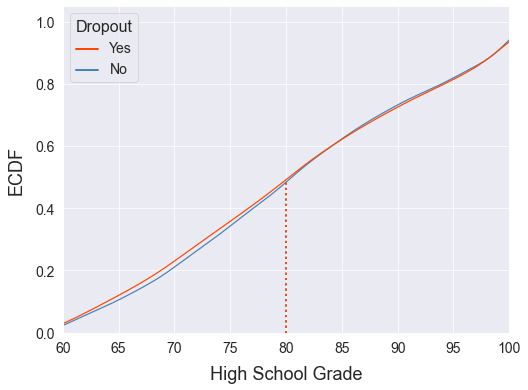

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ecdf_hs_grade(df_hs, ax)

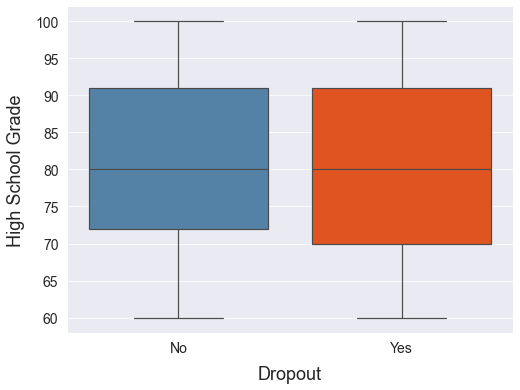

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_hs_grade(df_hs, ax)

##### Two-sample Kolmogorov-Smirnov test

In [ ]:
print(np.var(df_hs_do), np.var(df_hs_ndo))

146.0552370039591 144.43408941721594


In [ ]:
sp.ks_2samp(df_hs_do, df_hs_ndo)

Ks_2sampResult(statistic=0.023733691481197305, pvalue=0.027097190096926262)

### 5.4 Impact of socio-economical factors on dropout

#### 5.4.1 Annual Income

In [24]:
df_inc = df.dropna(subset = ["valoreIntero"])
#df_inc = df_inc.replace('\n','', regex=True)
df_inc = df_inc[(df_inc["valoreIntero"] != 50000) & (df_inc["valoreIntero"] < 1000000)]
df_inc_do = df_inc[df_inc["Dropout"]==True]["valoreIntero"]
df_inc_ndo = df_inc[df_inc["Dropout"]==False]["valoreIntero"]

In [25]:
print("Mean annual income (DROPOUT): {:.3f}".format(df_inc_do.mean()))
print("Median annual income (DROPOUT): {:.3f}".format(df_inc_do.median()))
print("Mean annual income (NON-DROPOUT): {:.3f}".format(df_inc_ndo.mean()))
print("Median annual income (NON-DROPOUT): {:.3f}".format(df_inc_ndo.median()))

Mean annual income (DROPOUT): 24036.989
Median annual income (DROPOUT): 19158.000
Mean annual income (NON-DROPOUT): 25230.513
Median annual income (NON-DROPOUT): 20499.000


In [26]:
def box_plot_income(df, ax):
    x_drop = df[df["Dropout"]==True]["valoreIntero"]/1000
    x_non_drop = df[df["Dropout"]==False]["valoreIntero"]/1000
    #_ = sns.kdeplot(data=df, x=x, hue=df["Dropout"], palette=[steel_blue, orange_red], shade=False, cumulative=False, ax=ax)
    #_ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=False, ax=ax)
    #_ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=False, ax=ax)
    _ = sns.boxplot(x="Dropout", y=df["valoreIntero"]/1000, data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Annual Income (x 1,000 Euros)", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

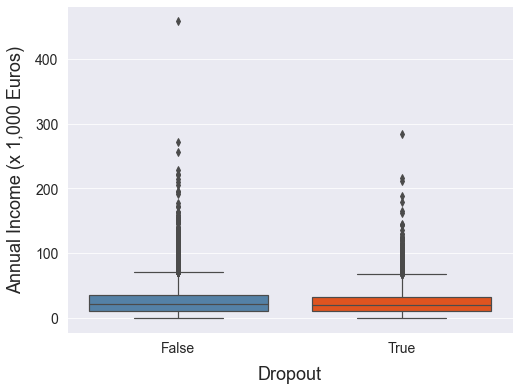

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_income(df_inc, ax)

##### Two-sample Kolmogorov-Smirnov test

In [28]:
print(np.var(df_inc_do), np.var(df_inc_ndo))

422669403.38641953 418297035.61675614


In [29]:
sp.ks_2samp(df_inc_do, df_inc_ndo)

KstestResult(statistic=0.03718558094665997, pvalue=7.381034026692478e-08)

### 5.5 Impact of geographical factors on dropout

#### 5.5.1 Nationality

In [30]:
def plot_by_cat(df, cat, cat_label, ax):
    df_grp = df.groupby(cat)["Dropout"]
    df_grp_vals = df_grp.value_counts(normalize=True).mul(100).rename('percent').reset_index()
    _ = sns.barplot(x="percent", y=cat, data=df_grp_vals, hue='Dropout', palette=[steel_blue, orange_red], orient="h", ax=ax)
    _ = ax.set_xlabel("Percentage (%)", labelpad=10, fontsize=18)
    _ = ax.set_ylabel(cat_label, labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    drop_patch = mpatches.Patch(color=orange_red, label='Yes')
    non_drop_patch = mpatches.Patch(color=steel_blue, label='No')
    plt.legend(title='Dropout', loc='best', bbox_to_anchor=(1, 1.02), handles=[drop_patch, non_drop_patch], fontsize=14, title_fontsize=16, fancybox=True)
    
    #(df.groupby('cittadinanza')['Dropout'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='cittadinanza',y='percent',hue='Dropout',kind='bar', palette=[steel_blue, orange_red]))

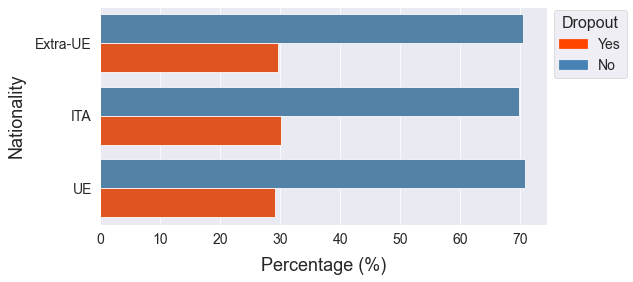

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_by_cat(df, "cittadinanza", "Nationality", ax)

##### Two-sample z-test for proportions

In [32]:
from statsmodels.stats.proportion import proportions_ztest
# can we assume anything from our sample
significance = 0.01
# note - the samples do not need to be the same size
sample_success_non_UE, sample_size_non_UE = (df[(df["cittadinanza"] == "Extra-UE") & (df["Dropout"] == True)].shape[0], df[df["cittadinanza"] == "Extra-UE"].shape[0])
sample_success_ITA, sample_size_ITA = (df[(df["cittadinanza"] == "ITA") & (df["Dropout"] == True)].shape[0], df[df["cittadinanza"] == "ITA"].shape[0])
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_non_UE, sample_success_ITA])
samples = np.array([sample_size_non_UE, sample_size_ITA])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: -0.824, p_value: 0.410
Fail to reject the null hypothesis - we have nothing else to say


### 5.6 Model performance on the test set

In [33]:
results = {'Method': ['RF', 'GBDT', 'LR', 'SVM', 'MLP'], 
           'Precision': [0.90, 0.92, 0.84, 0.87, 0.89],
           'Recall': [0.92, 0.91, 0.88, 0.90, 0.87],
           'F1 score': [0.91, 0.92, 0.85, 0.88, 0.88]
}
# DT AUC = 0.98
# RF AUC = 0.98
# GBDT AUC = 0.99
# LR AUC = 0.84
# SVM AUC = 0.83
# MLP AUC = 0.94

In [34]:
res_df = pd.DataFrame(results)

In [35]:
res_df.head(10)

,Method,Precision,Recall,F1 score
0,RF,0.90,0.92,0.91
1,GBDT,0.92,0.91,0.92
2,LR,0.84,0.88,0.85
3,SVM,0.87,0.90,0.88
4,MLP,0.89,0.87,0.88


In [36]:
def plot_res(df, ax):
    df.plot(x="Method", y=["Precision", "Recall", "F1 score"], kind="bar", color=[steel_blue, orange_red, "forestgreen"], ax=ax)
    plt.legend(loc='best', bbox_to_anchor=(1, 1.02), fontsize=16, fancybox=True)
    _ = ax.set_xlabel("Method", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # get all bars in the plot
    # bars = ax.patches
    # patterns = ['|', '-', '+']  # set hatch patterns in the correct order
    # hatches = []  # list for hatches in the order of the bars
    # for h in patterns:  # loop over patterns to create bar-ordered hatches
    #     for i in range(int(len(bars) / len(patterns))):
    #         hatches.append(h)
    # for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    #     bar.set_hatch(hatch)

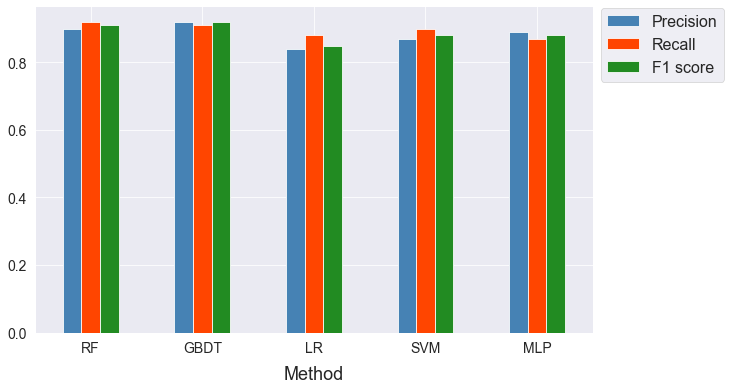

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_res(res_df, ax)

### 5.7 GBDT Feature Importance

In [38]:
feat_df = pd.read_csv('assets/feat_importance.csv')

In [39]:
top_10_feat_df = feat_df.head(10)[["feature","importance"]]

In [41]:
feature_names = ["lastEnrollment", "creditsEarned", "totalCredits", "avgGrade", "age", "HSDiplomaScore", "lastPassedExam", "hasPicture", "lastBookedExam", "creditsBooked"]

In [42]:
top_10_feat_df["feature_names"] = feature_names

In [43]:
top_10_feat_df

,feature,importance,feature_names
0,ultIscr,0.530623,lastEnrollment
1,cfuTake,0.227225,creditsEarned
2,creditiTotali,0.065688,totalCredits
3,mediaVoto,0.056243,avgGrade
4,eta,0.018118,age
5,votoDiploma,0.016630,HSDiplomaScore
6,ultSup,0.016327,lastPassedExam
7,flagIdentificato,0.011638,hasPicture
8,ultPren,0.011527,lastBookedExam
9,cfuPrenotati,0.011173,creditsBooked


In [44]:
def plot_feat_importance(df, ax):
    _ = ax = sns.barplot(x="importance", y="feature_names", data=df, axes=ax)
    _ = ax.set_ylabel("Feature", labelpad=10, fontsize=18)
    _ = ax.set_xlabel("Importance", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

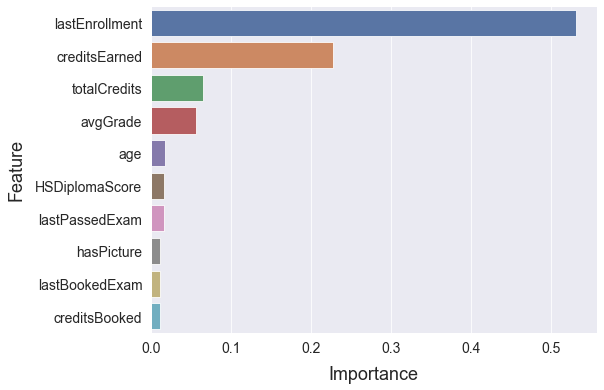

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_feat_importance(top_10_feat_df, ax)

### Analysis of the on-line results

In [4]:
df = pd.read_csv('assets/results_2022-06-24T17 22 29.132166+00 00.csv', sep=',')
print("df.shape: ", df.shape)

df.shape:  (6470, 3)


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

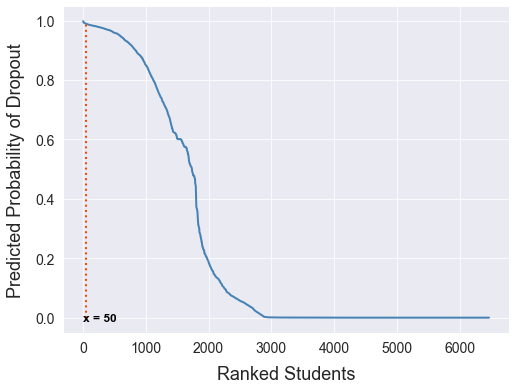

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.plot(df.Dropout, color=steel_blue, linewidth=2)
plt.vlines(50, 0, df.iloc[50]['Dropout'], color=orange_red, ls=':', lw=2)
plt.text(00, -0.01, 'x = 50', fontsize=12, weight='bold', color='black')
_ = ax.set_xlabel("Ranked Students", labelpad=10, fontsize=18)
_ = ax.set_ylabel("Predicted Probability of Dropout", labelpad=10, fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Per analisi finale

In [20]:
sentinels = ['None', 'n.d.', ' ', '']
df = pd.read_csv('assets/Infostud SDP - Studenti contattati.csv', sep=',', na_values=sentinels)

In [21]:
df.columns

Index(['Dropout', 'Nome', 'Cognome', 'Email istituzionale', 'Email personale',
       'ID', 'ultimoAccesso', 'Prima iscrizione', 'Ultima iscrizione',
       'ultimoSostenuto', 'mediaVoto'],
      dtype='object')

### Media voto

In [6]:
df_mv = df[(df["mediaVoto"] >= 18) & (df["mediaVoto"] <=31)]
df_mv_do = df_mv[df_mv["Dropout"]==True]["mediaVoto"]
df_mv_ndo = df_mv[df_mv["Dropout"]==False]["mediaVoto"]

In [7]:
print("Mean avg. grade (DROPOUT): {:.3f}".format(df_mv_do.mean()))
print("Median avg. grade (DROPOUT): {:.3f}".format(df_mv_do.median()))
print("Mean avg. grade (NON-DROPOUT): {:.3f}".format(df_mv_ndo.mean()))
print("Median avg. grade (NON-DROPOUT): {:.3f}".format(df_mv_ndo.median()))

Mean avg. grade (DROPOUT): 23.638
Median avg. grade (DROPOUT): 23.000
Mean avg. grade (NON-DROPOUT): 22.500
Median avg. grade (NON-DROPOUT): 22.000


In [8]:
def ecdf_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["mediaVoto"]
    x_non_drop = df[df["Dropout"]==False]["mediaVoto"]
    
    _ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=True, ax=ax)
    _ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=True, ax=ax)
    plt.xlim([18, 31])
    plot_median(ax.lines[0], x_non_drop, ax, color=steel_blue, fill=False)
    plot_median(ax.lines[1], x_drop, ax, color=orange_red, fill=False)
    _ = ax.set_xlabel("Average Grade", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Density", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    #drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(orange_red, alpha=0.2), ec=orange_red)
    #non_drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(steel_blue, alpha=0.2), ec=steel_blue)
    drop = plt.Line2D([0], [0], color=orange_red, lw=2)
    non_drop = plt.Line2D([0], [0], color=steel_blue, lw=2)
    _ = plt.legend([handle for i,handle in enumerate(handles) if i in display]+[drop, non_drop],
               [label for i,label in enumerate(labels) if i in display]+["Yes", "No"], 
               handlelength=1.6, handleheight=0, title="Dropout", fontsize=14, title_fontsize=16, fancybox=True)

In [9]:
def box_plot_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["mediaVoto"]
    x_non_drop = df[df["Dropout"]==False]["mediaVoto"]

    _ = sns.boxplot(x="Dropout", y=df["mediaVoto"], data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Avg. Grade", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

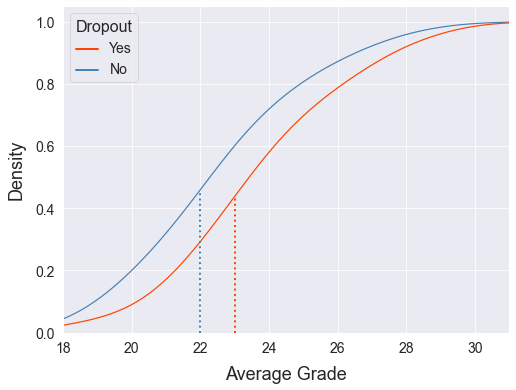

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ecdf_avg_grade(df_mv, ax)

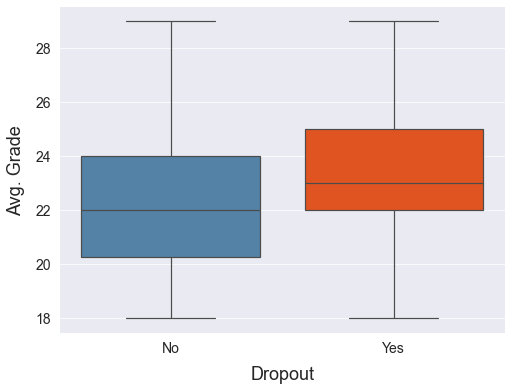

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_avg_grade(df_mv, ax)

##### Two-sample Kolmogorov-Smirnov test

In [15]:
print(np.var(df_mv_do), np.var(df_mv_ndo))

6.7840651878678155 6.77


In [16]:
sp.ks_2samp(df_mv_do, df_mv_ndo)

KstestResult(statistic=0.2195744680851064, pvalue=0.15977353602069677)

### Ultimo accesso

In [32]:
df_mv = df[(df["ultimoAccesso"] >= 0)]
df_mv_do = df_mv[df_mv["Dropout"]==True]["ultimoAccesso"]
df_mv_ndo = df_mv[df_mv["Dropout"]==False]["ultimoAccesso"]

In [31]:
print("Mean last login (DROPOUT): {:.3f}".format(df_mv_do.mean()))
print("Median last login (DROPOUT): {:.3f}".format(df_mv_do.median()))
print("Mean last login (NON-DROPOUT): {:.3f}".format(df_mv_ndo.mean()))
print("Median last login (NON-DROPOUT): {:.3f}".format(df_mv_ndo.median()))

Mean last login (DROPOUT): 15.200
Median last login (DROPOUT): 14.000
Mean last login (NON-DROPOUT): 4.140
Median last login (NON-DROPOUT): 5.000


In [33]:
def ecdf_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["ultimoAccesso"]
    x_non_drop = df[df["Dropout"]==False]["ultimoAccesso"]
    
    _ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=True, ax=ax)
    _ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=True, ax=ax)
    plt.xlim([18, 31])
    plot_median(ax.lines[0], x_non_drop, ax, color=steel_blue, fill=False)
    plot_median(ax.lines[1], x_drop, ax, color=orange_red, fill=False)
    _ = ax.set_xlabel("Last login", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Density", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    #drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(orange_red, alpha=0.2), ec=orange_red)
    #non_drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(steel_blue, alpha=0.2), ec=steel_blue)
    drop = plt.Line2D([0], [0], color=orange_red, lw=2)
    non_drop = plt.Line2D([0], [0], color=steel_blue, lw=2)
    _ = plt.legend([handle for i,handle in enumerate(handles) if i in display]+[drop, non_drop],
               [label for i,label in enumerate(labels) if i in display]+["Yes", "No"], 
               handlelength=1.6, handleheight=0, title="Dropout", fontsize=14, title_fontsize=16, fancybox=True)

In [34]:
def box_plot_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["ultimoAccesso"]
    x_non_drop = df[df["Dropout"]==False]["ultimoAccesso"]

    _ = sns.boxplot(x="Dropout", y=df["ultimoAccesso"], data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Last login", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

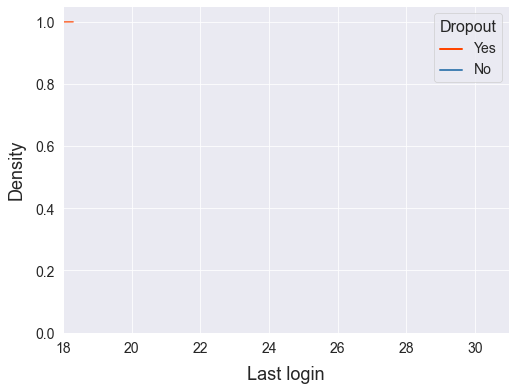

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ecdf_avg_grade(df_mv, ax)

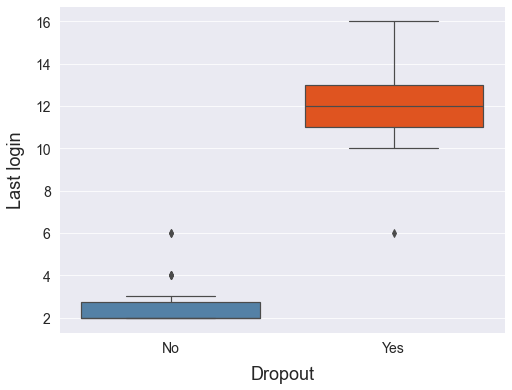

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_avg_grade(df_mv, ax)

##### Two-sample Kolmogorov-Smirnov test

In [37]:
print(np.var(df_mv_do), np.var(df_mv_ndo))

2.758400000000001 0.8883999999999996


In [38]:
sp.ks_2samp(df_mv_do, df_mv_ndo)

KstestResult(statistic=0.98, pvalue=1.9823306042836677e-27)

### Ultimo superato

In [44]:
df_mv = df[(df["ultimoSostenuto"] > 0)]
df_mv_do = df_mv[df_mv["Dropout"]==True]["ultimoSostenuto"]
df_mv_ndo = df_mv[df_mv["Dropout"]==False]["ultimoSostenuto"]

In [45]:
print("Mean passed (DROPOUT): {:.3f}".format(df_mv_do.mean()))
print("Median passed (DROPOUT): {:.3f}".format(df_mv_do.median()))
print("Mean passed (NON-DROPOUT): {:.3f}".format(df_mv_ndo.mean()))
print("Median passed (NON-DROPOUT): {:.3f}".format(df_mv_ndo.median()))

Mean passed (DROPOUT): 16.170
Median passed (DROPOUT): 14.000
Mean passed (NON-DROPOUT): 4.140
Median passed (NON-DROPOUT): 5.000


In [46]:
def ecdf_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["ultimoSostenuto"]
    x_non_drop = df[df["Dropout"]==False]["ultimoSostenuto"]
    
    _ = sns.kdeplot(x_non_drop, color=steel_blue, shade=False, cumulative=True, ax=ax)
    _ = sns.kdeplot(x_drop, color=orange_red, shade=False, cumulative=True, ax=ax)
    plt.xlim([18, 31])
    plot_median(ax.lines[0], x_non_drop, ax, color=steel_blue, fill=False)
    plot_median(ax.lines[1], x_drop, ax, color=orange_red, fill=False)
    _ = ax.set_xlabel("Last passed", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Density", labelpad=10, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    #drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(orange_red, alpha=0.2), ec=orange_red)
    #non_drop = plt.Rectangle((0, 0), 1, 1, fc=clr.to_rgba(steel_blue, alpha=0.2), ec=steel_blue)
    drop = plt.Line2D([0], [0], color=orange_red, lw=2)
    non_drop = plt.Line2D([0], [0], color=steel_blue, lw=2)
    _ = plt.legend([handle for i,handle in enumerate(handles) if i in display]+[drop, non_drop],
               [label for i,label in enumerate(labels) if i in display]+["Yes", "No"], 
               handlelength=1.6, handleheight=0, title="Dropout", fontsize=14, title_fontsize=16, fancybox=True)

In [47]:
def box_plot_avg_grade(df, ax):
    x_drop = df[df["Dropout"]==True]["ultimoSostenuto"]
    x_non_drop = df[df["Dropout"]==False]["ultimoSostenuto"]

    _ = sns.boxplot(x="Dropout", y=df["ultimoSostenuto"], data=df, palette=[steel_blue, orange_red], ax=ax)
    _ = ax.set_xlabel("Dropout", labelpad=10, fontsize=18)
    _ = ax.set_ylabel("Last passed", labelpad=10, fontsize=18)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'No'
    labels[1] = 'Yes'
    _ = ax.set_xticklabels(labels, rotation=0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

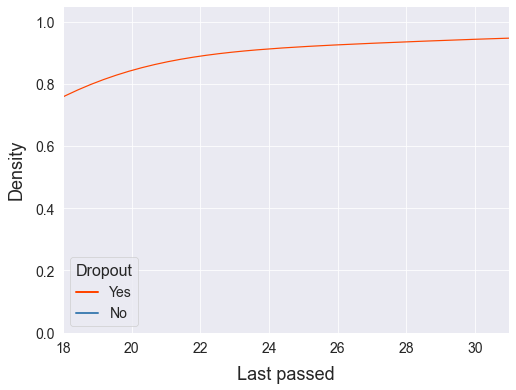

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ecdf_avg_grade(df_mv, ax)

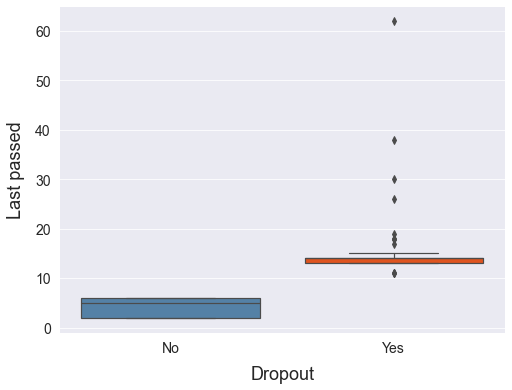

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
box_plot_avg_grade(df_mv, ax)

##### Two-sample Kolmogorov-Smirnov test

In [50]:
print(np.var(df_mv_do), np.var(df_mv_ndo))

67.6306020823902 2.9203999999999986


In [51]:
sp.ks_2samp(df_mv_do, df_mv_ndo)

KstestResult(statistic=1.0, pvalue=0.0)

In [43]:
np.mean(df.loc[df["Dropout"] == True, "mediaVoto"])

22.94

In [42]:
np.mean(df.loc[df["Dropout"] == False, "mediaVoto"])

22.5